In [3]:
# Crafted 1-12-21 : Jeffrey T. Scott

# Initial imports
import pandas as pd 
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

#import matplotlib as plt
whale_path=Path('whale_returns.csv')
sp500_path=Path('sp500_history.csv')
algo_path=Path('algo_returns.csv')

In [4]:
# Reading whale returns
whale_df = pd.read_csv(whale_path
                        , index_col= 'Date'
                        , infer_datetime_format= True
                        , parse_dates= True
                    ).sort_index()

In [25]:
# Count nulls
whale_df.isnull().sum()
# Drop nulls
whale_clean_df=whale_df.dropna()
# Check Data
whale_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [6]:
# Reading algorithmic returns
algo_df= pd.read_csv(algo_path
                    , index_col='Date'
                    , infer_datetime_format=True
                    , parse_dates=True
                 ).sort_index()                

In [7]:
# Count nulls
algo_df.isnull().sum()
# Drop nulls
algo_clean_df= algo_df.dropna()
# Check Data/
algo_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


In [74]:
# Reading S&P 500 Closing Prices
sp500_df= pd.read_csv(sp500_path
                    , index_col= 'Date'
                    , infer_datetime_format= True
                    , parse_dates= True
                    ).sort_index()

In [75]:
# Count Nulls
sp500_df.isnull().sum().sum()
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype("float")

In [76]:
# Calculate Daily Returns
sp500_df_rtns=sp500_df.pct_change()

In [77]:
# Drop nulls & Rename `Close` Column to be specific to this portfolio.
sp500_cleaned=sp500_df_rtns.dropna().rename(columns={"Close": "S&P500 Returns"})
sp500_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S&P500 Returns  1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [78]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_rtns = pd.concat([sp500_cleaned,algo_clean_df,whale_clean_df], axis='columns', join='inner')
combined_rtns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2015-03-03 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S&P500 Returns               1043 non-null   float64
 1   Algo 1                       1043 non-null   float64
 2   Algo 2                       1043 non-null   float64
 3   SOROS FUND MANAGEMENT LLC    1043 non-null   float64
 4   PAULSON & CO.INC.            1043 non-null   float64
 5   TIGER GLOBAL MANAGEMENT LLC  1043 non-null   float64
 6   BERKSHIRE HATHAWAY INC       1043 non-null   float64
dtypes: float64(7)
memory usage: 65.2 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

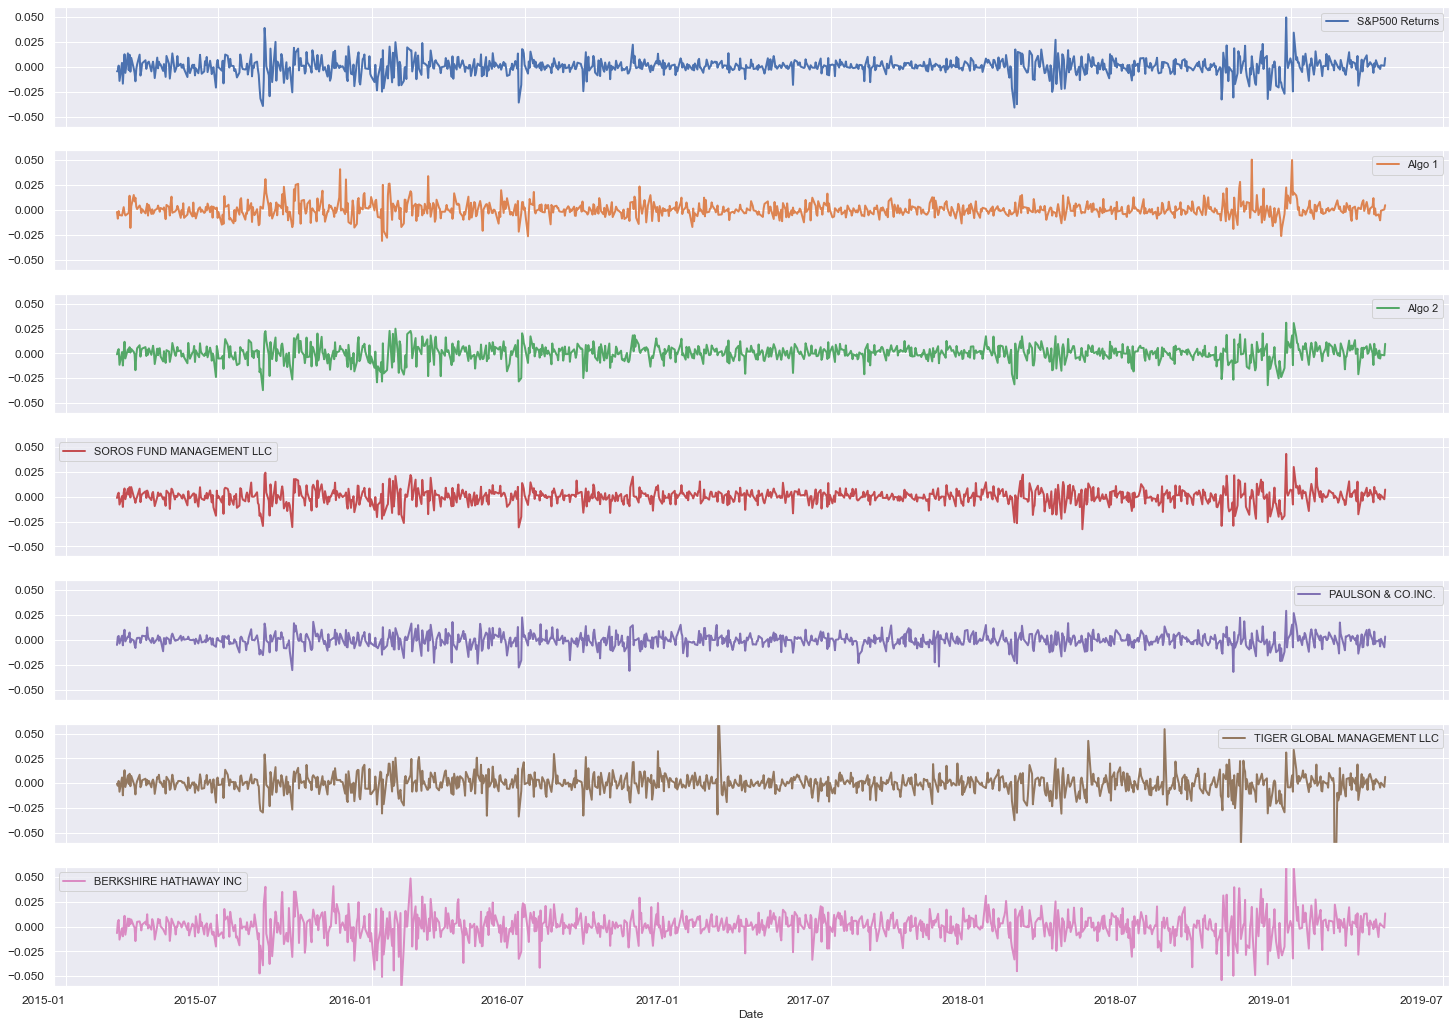

In [80]:
# Plot daily returns of all portfolios
combined_rtns.plot(
            kind='line'
            , figsize=(25,20)
            , grid=True
            , subplots=True
            , fontsize=12
            , ylim=[-.06,.06]
            , rot=360
            , lw=2
        )
    

<AxesSubplot:title={'center':'Portfolio Returns'}, xlabel="Date's", ylabel='Total Rtns'>

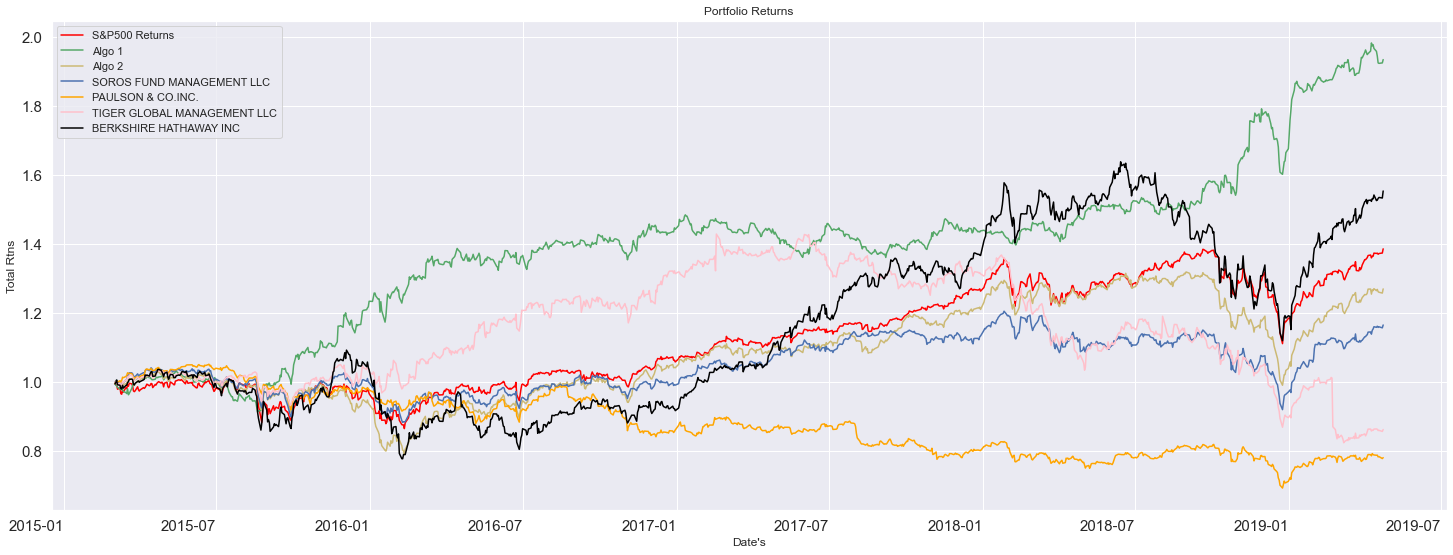

In [81]:
# Calculate cumulative returns of all portfolios
cum_rets = (1 + combined_rtns).cumprod()
cum_rets.plot(
        kind='line'
        , figsize=(25,10)
        , grid=True
        , title="Portfolio Returns"
        , ylabel="Total Rtns"
        , xlabel='Date\'s'
        , rot=360
        , fontsize=15
        , color=['red','g','y','b','orange','pink','black']
    )

<AxesSubplot:title={'center':'Portfolio Returns'}, ylabel='Risk Percentile'>

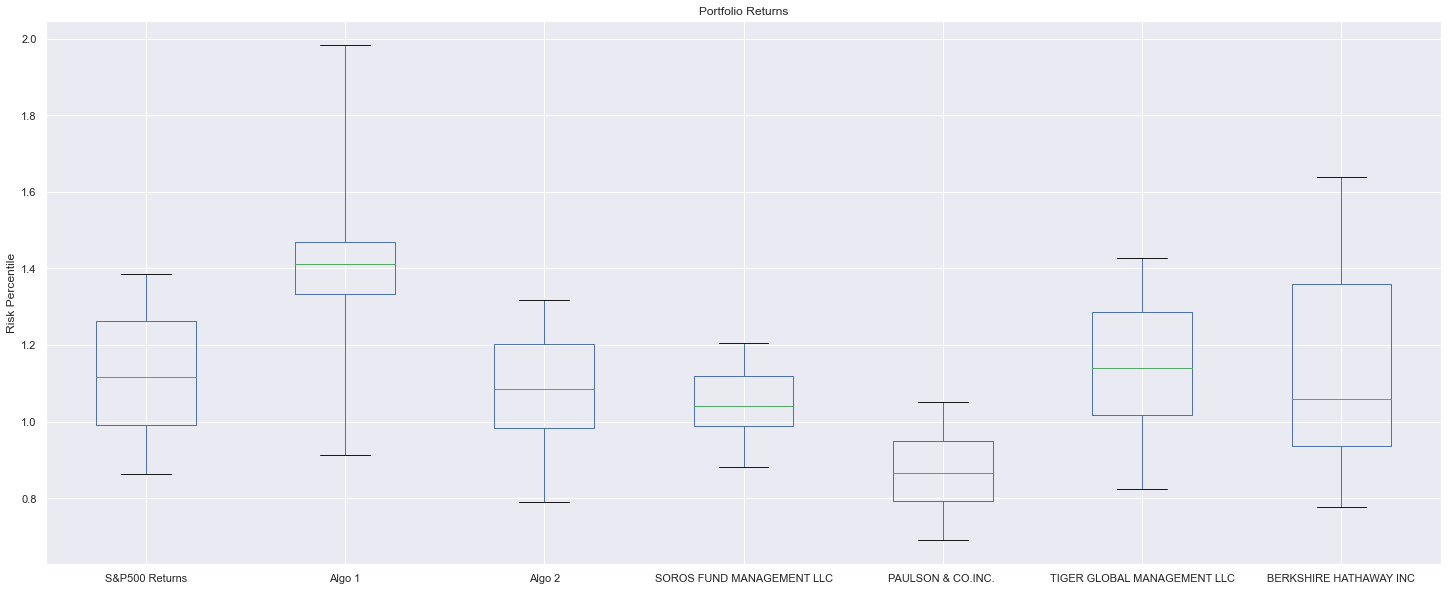

In [82]:
# Box plot to visually show risk
cum_rets.plot(
    kind='box'
    , figsize=(25,10)
    , grid=True 
    , title="Portfolio Returns"
    #, ylim=[-.2,.2]
    , ylabel="Risk Percentile"
    , rot=360
    , whis = [0,100]
    #, fontsize=15
) 

In [83]:
# Calculate the daily standard deviations of all portfolios
daily_std=combined_rtns.std().sort_values()
daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500 Returns                 0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [85]:
# my horrible attempt at making a more readable table to assess the most risky portfolios.
daily_std_chart= pd.concat([daily_std],axis='columns',join='outer')
bins = [0, 0.008553, 0.008555, 1]
group_names = ["Lower", "Benchmark", "Higher"]
daily_std_chart["Risk Level"] = pd.cut(daily_std_chart[0], bins, labels=group_names)
daily_std_chart.columns = ['STD','Risk Level']
daily_std_chart


,STD,Risk Level
PAULSON & CO.INC.,0.007023,Lower
Algo 1,0.007620,Lower
SOROS FUND MANAGEMENT LLC,0.007895,Lower
Algo 2,0.008342,Lower
S&P500 Returns,0.008554,Benchmark
TIGER GLOBAL MANAGEMENT LLC,0.010894,Higher
BERKSHIRE HATHAWAY INC,0.012919,Higher


In [149]:
# Calculate  the daily standard deviation of S&P 500
daily_std['S&P500 Returns'].round(6)
# Determine which portfolios are riskier than the S&P 500
print(f'The following Portfolios are riskier than the SP500: \n\n '
      f'{daily_std_chart.iloc[5::]}')

The following Portfolios are riskier than the SP500: 

                                   STD Risk Level
TIGER GLOBAL MANAGEMENT LLC  0.010894     Higher
BERKSHIRE HATHAWAY INC       0.012919     Higher


In [150]:
# Calculate the annualized standard deviation (252 trading days)
annual_std=daily_std*np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500 Returns                 0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

<AxesSubplot:xlabel='Date'>

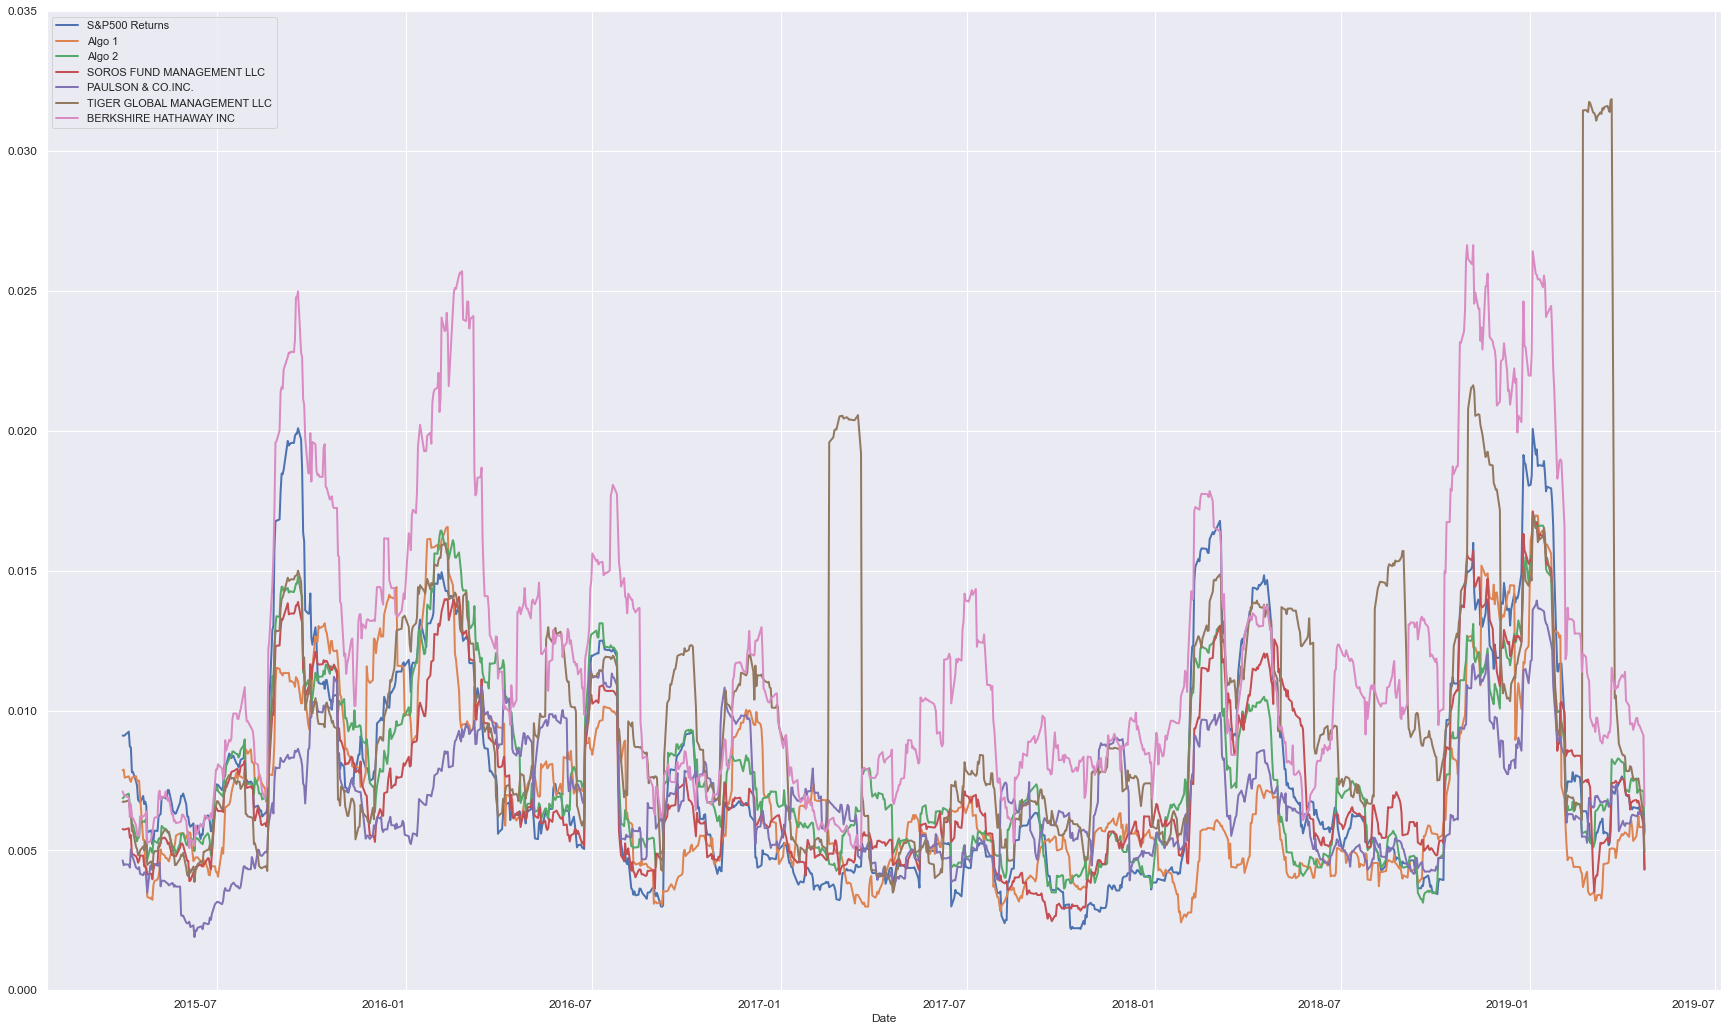

In [94]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_twenty_one=combined_rtns.rolling(window=21).std().dropna()
# Plot the rolling standard deviation
roll_twenty_one.plot(
              kind='line'
            , figsize=(30,20)
            , grid=True
            #, subplots=True
            , fontsize=12
            , ylim=[0,.035]
            , rot=360
            , lw=2
            #, color=['r','b','b','g','g','g','g']
        )

Algo 1                         2.614209
TIGER GLOBAL MANAGEMENT LLC    3.715893
PAULSON & CO.INC.              4.296740
BERKSHIRE HATHAWAY INC         4.455893
Algo 2                         4.847528
SOROS FUND MANAGEMENT LLC      5.001465
S&P500 Returns                 5.021171
dtype: float64


<AxesSubplot:>

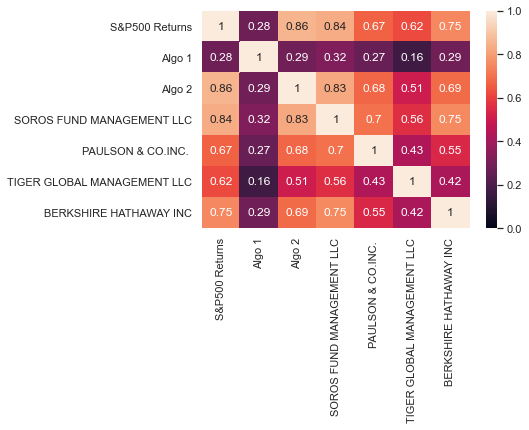

In [95]:
# Calculate the correlation
correlation=combined_rtns.corr()
# Display the correlation matrix
print(correlation.sum(axis=0).sort_values())
sns.set_theme(style='dark')
sns.heatmap(correlation, vmin=0, vmax=1,annot=True,)


In [66]:
### Calculate and Plot Beta for a chosen portfolio and the S&P 500
combined_rtns.keys()


Index(['S&P500 Returns', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC',
       'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC'],
      dtype='object')

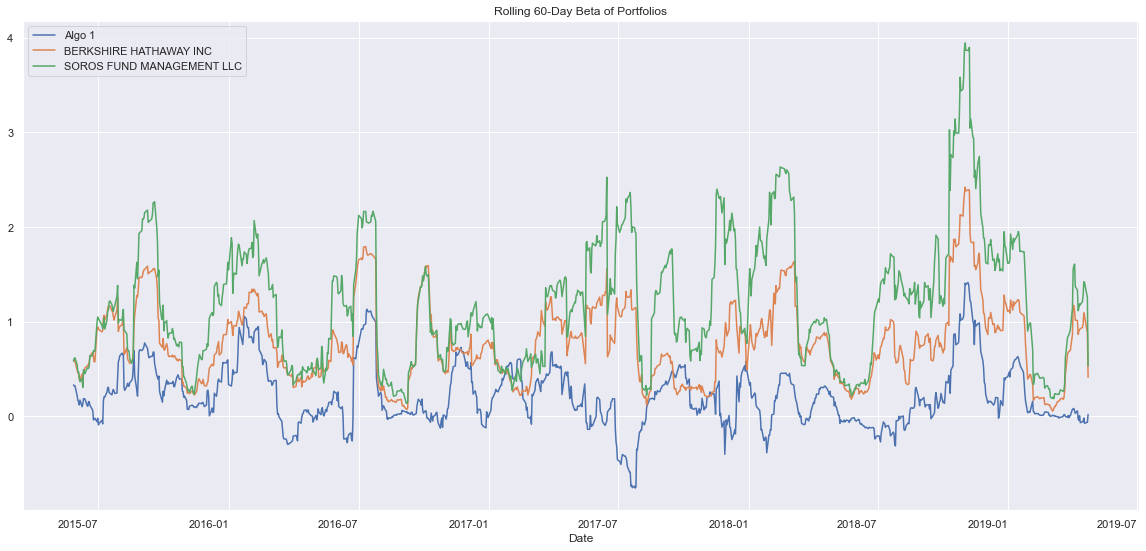

In [107]:
#.  how the heck do i make this condensed into a for or if statement...can i create a custom bdate range datetimeIndex and assign it to a index column in a empty data series, then concat the inner data onto the needed dates?

#1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
#2. Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P 500.
#3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
# Calculate covariance of a single portfolio--i didnt know which one i wanted to do 
algo_1_cov=combined_rtns['Algo 1'].cov(combined_rtns['S&P500 Returns'])
algo_2_cov=combined_rtns['Algo 2'].cov(combined_rtns['S&P500 Returns'])
soros_cov=combined_rtns['SOROS FUND MANAGEMENT LLC'].cov(combined_rtns['S&P500 Returns'])
paul_cov=combined_rtns['PAULSON & CO.INC. '].cov(combined_rtns['S&P500 Returns'])
tiger_cov=combined_rtns['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_rtns['S&P500 Returns'])
buffet_cov=combined_rtns['BERKSHIRE HATHAWAY INC'].cov(combined_rtns['S&P500 Returns'])
# Calculate variance of S&P 500
variance=combined_rtns['S&P500 Returns'].var()
# Computing beta
algo_1_beta=algo_1_cov/variance
algo_2_beta=algo_2_cov/variance
soros_beta=soros_cov/variance
paul_beta=paul_cov/variance
tiger_beta=tiger_cov/variance
buffet_beta=buffet_cov/variance
# Calculate rolling covariance
roll_algo_1_cov = combined_rtns['Algo 1'].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
roll_algo_2_cov = combined_rtns['Algo 2'].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
roll_soros_cov = combined_rtns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
roll_paul_cov = combined_rtns['PAULSON & CO.INC. '].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
roll_tiger_cov = combined_rtns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
roll_buffet_cov = combined_rtns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_rtns['S&P500 Returns'])
# Calculate rolling variance of sp500
roll_variance = combined_rtns['S&P500 Returns'].rolling(window=60).var()
# calulating rolling betas
roll_algo_1_beta = roll_algo_1_cov / roll_variance
roll_algo_2_beta = roll_algo_2_cov / roll_variance
roll_soros_beta = roll_soros_cov / roll_variance
roll_paul_beta = roll_paul_cov / roll_variance
roll_tiger_beta = roll_tiger_cov / roll_variance
roll_buffet_beta = roll_buffet_cov / roll_variance


df1=pd.concat([roll_algo_1_beta,roll_soros_beta,roll_buffet_beta],axis='columns',join='inner')
df=pd.concat([roll_algo_1_beta,roll_algo_2_beta,roll_soros_beta,roll_paul_beta,roll_tiger_beta,roll_buffet_beta], axis='columns', join='inner')
#ploting these 
ax = roll_algo_1_beta.plot(figsize=(20, 10)
                            , title='Rolling 60-Day Beta of Portfolios'
                            , grid = True
                            , rot=360);
roll_soros_beta.plot(ax=ax
                     , rot=360
                    , grid = True)
roll_buffet_beta.plot(ax=ax
                     , rot=360
                     , grid = True)
#roll_algo_2_beta.plot(ax=ax
#                     , rot=360
#                    , grid = True)
#roll_paul_beta.plot(ax=ax
#                    , rot=360
#                    , grid = True)
#roll_tiger_beta.plot(ax=ax
#                    , rot=360
#                    , grid = True)

ax.legend(['Algo 1','BERKSHIRE HATHAWAY INC','SOROS FUND MANAGEMENT LLC']) 
#'Algo 2','PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC'])
#df.plot(kind='line').legend(['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC',
#      'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
#     'BERKSHIRE HATHAWAY INC'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

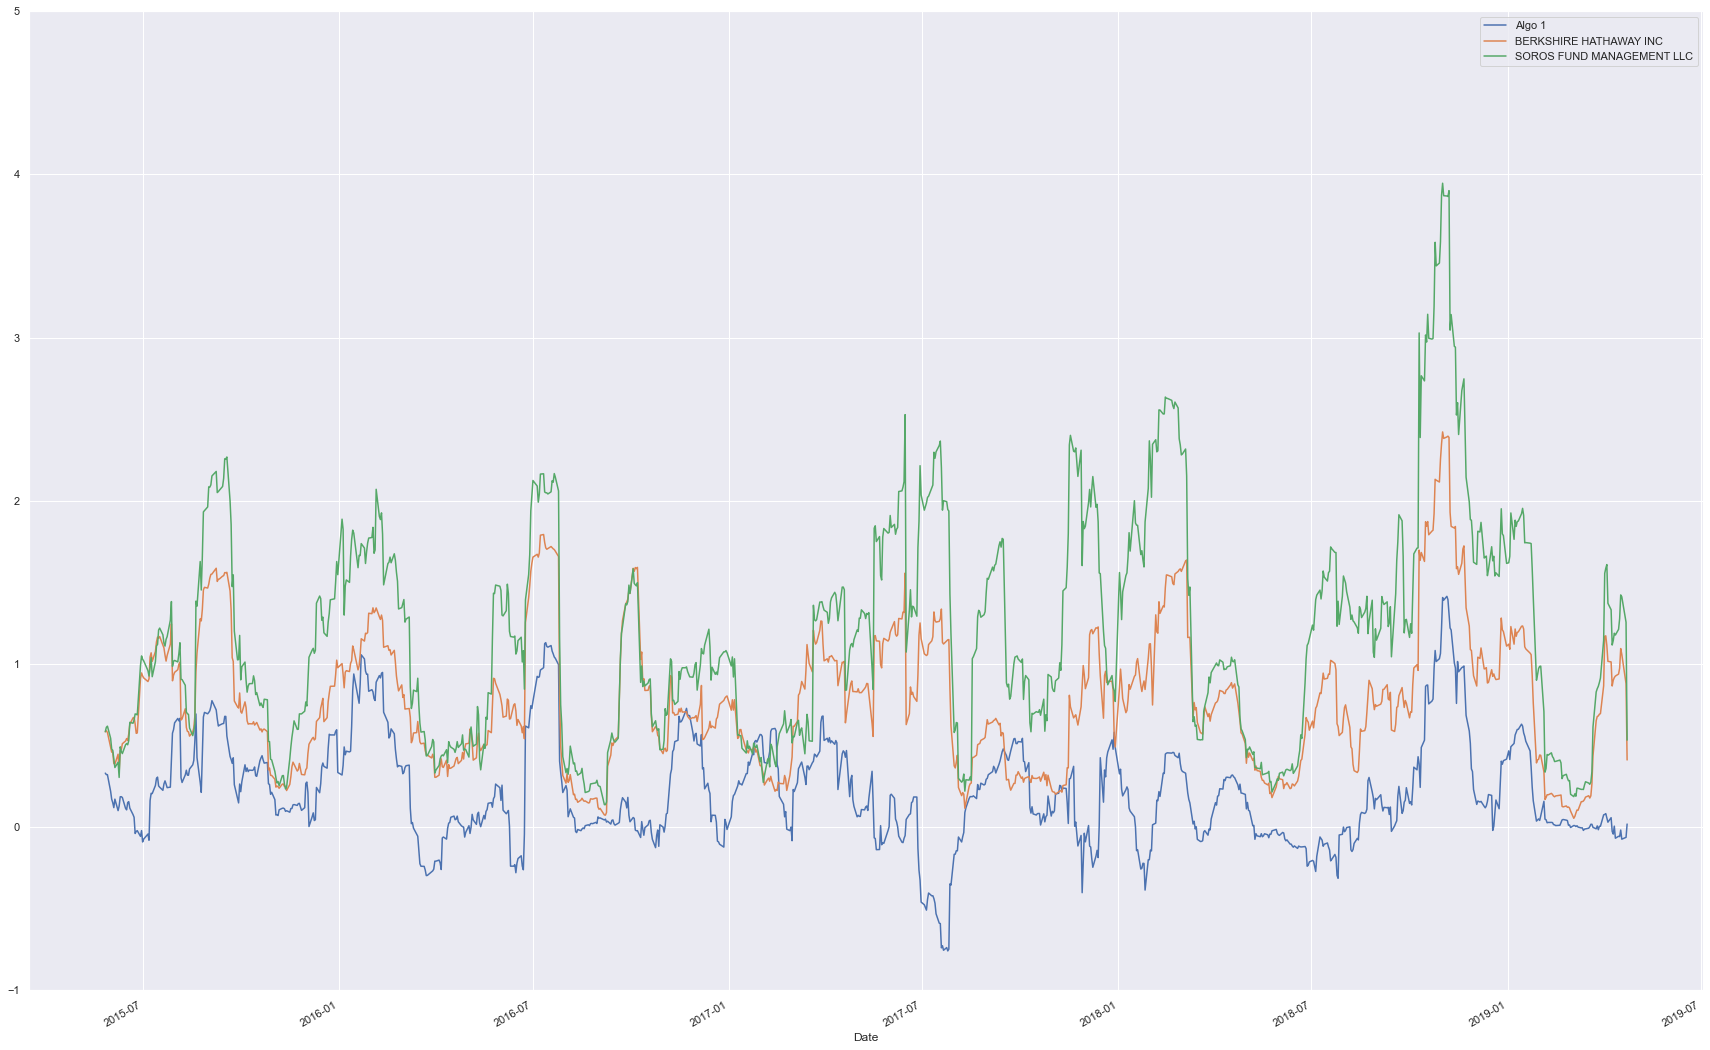

In [112]:
# Use `ewm` to calculate the rolling window
#times=['2015-03-03':'2019-04-23':'1D']
df.index
dfewa=df1.ewm(halflife='21',times=(df1.index)).mean()
dfewa.columns=['Algo 1','BERKSHIRE HATHAWAY INC','SOROS FUND MANAGEMENT LLC']
dfewa.plot(subplots=False,figsize=(30,20),grid=True,ylim=(-1,5))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Annualized Sharpe Ratios
sharpie_ratio=((combined_rtns.mean())*252)/(combined_rtns.std()*np.sqrt(252))
sharpie_ratio.sort_values(inplace=True)
sharpie_ratio

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P500 Returns                 0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

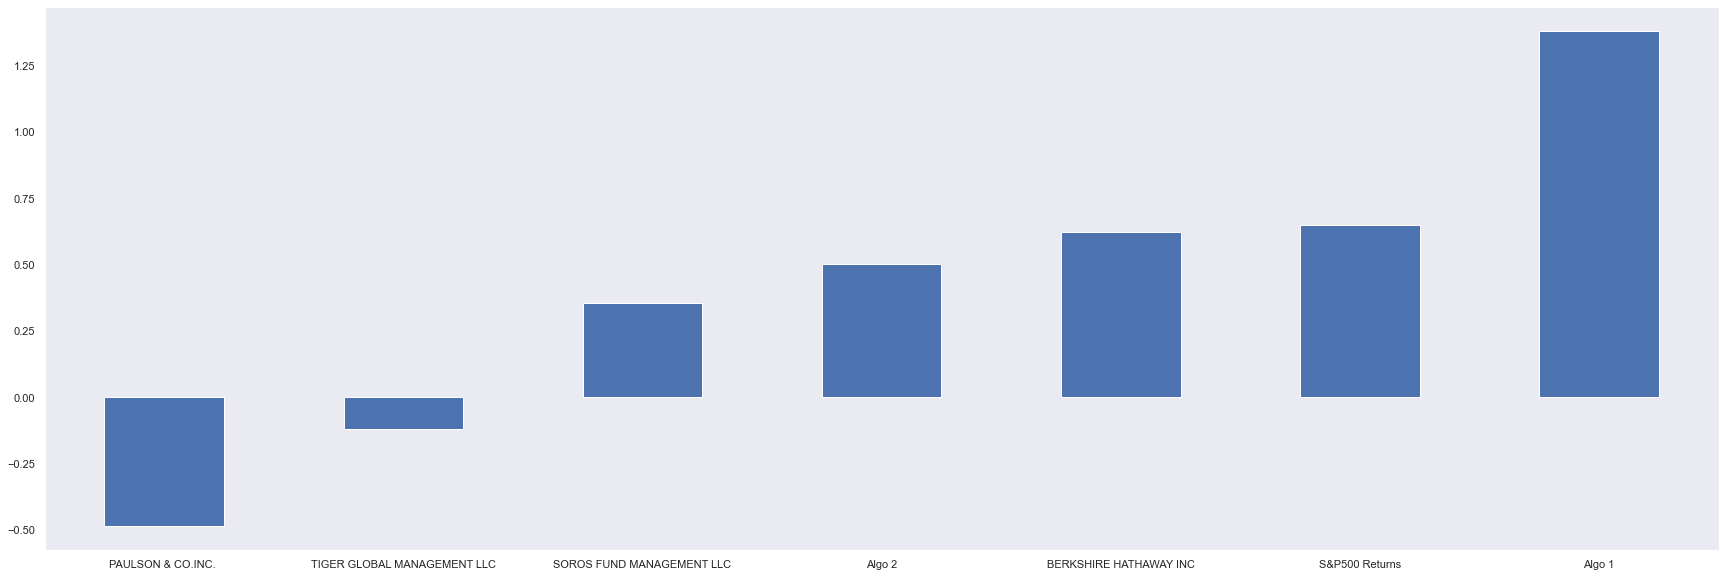

In [114]:
# Visualize the sharpe ratios as a bar plot
sharpie_ratio.plot(
                kind='bar'
                , rot=360
                , figsize=(30,10)
)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [43]:
# Reading data from 1st stock
googdf=pd.read_csv('goog_historical.csv'
                        , index_col = 'Trade DATE'
                        , infer_datetime_format = True
                        , parse_dates = True
                    ).sort_index()
googdf=googdf['NOCP']

googdf=googdf.rename('Google')


In [115]:
# Reading data from 2nd stock
aapldf=pd.read_csv('aapl_historical.csv',index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapldf=aapldf['NOCP']
aapldf=aapldf.rename('Apple')
aapldf

Trade DATE
2019-05-09    200.72
2019-05-08    202.90
2019-05-07    202.86
2019-05-06    208.48
2019-05-03    211.75
               ...  
2018-05-17    186.99
2018-05-16    188.18
2018-05-15    186.44
2018-05-14    188.15
2018-05-11    188.59
Name: Apple, Length: 250, dtype: float64

In [45]:
# Reading data from 3rd stock
costdf=pd.read_csv('cost_historical.csv',index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
costdf=costdf['NOCP']
costdf=costdf.rename('Costco')

In [116]:
# Combine all stocks in a single DataFrame
combineddf=pd.concat([costdf,googdf,aapldf],axis='columns',join='inner')

In [124]:
# Reset Date index--why??????____ you can reset index but I have combined and changed in a way that I dont believe neeeds to be reset
myportcleaned=combineddf.sort_index().pct_change().dropna()
myportcleaned=myportcleaned.rename_axis('Date')
myportcleaned.tail()



,Costco,Google,Apple
Date,,,
2019-05-03,0.007953,0.019602,0.012431
2019-05-06,-0.001594,0.003366,-0.015443
2019-05-07,-0.016583,-0.012855,-0.026957
2019-05-08,0.004830,-0.006669,0.000197
2019-05-09,0.008826,-0.003335,-0.010744


In [126]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
my_portfolio_returns=myportcleaned.dot(weights)
my_portfolio_returns.tail(20)



Date
2019-04-11   -0.008023
2019-04-12    0.004513
2019-04-15    0.007522
2019-04-16    0.000340
2019-04-17    0.009292
2019-04-18    0.001545
2019-04-22    0.001217
2019-04-23    0.011959
2019-04-24    0.000463
2019-04-25   -0.004220
2019-04-26   -0.001704
2019-04-29    0.005170
2019-04-30   -0.030368
2019-05-01    0.005291
2019-05-02   -0.002212
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame
endreport=pd.concat([combined_rtns,my_portfolio_returns],axis='columns',join='inner')
endreport=endreport.rename(columns={ 0: "MyPortfolio"})
endreport.keys()

Index(['S&P500 Returns', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC',
       'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC', 'MyPortfolio'],
      dtype='object')

In [152]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
endreport=endreport.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [132]:
# Calculate the daily `std`
endreportdailystd=endreport.std()
# Calculate the annualized `std`
annualizedendreportstd=endreportdailystd*np.sqrt(252)
annualizedendreportstd

S&P500 Returns                 0.152054
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
MyPortfolio                    0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

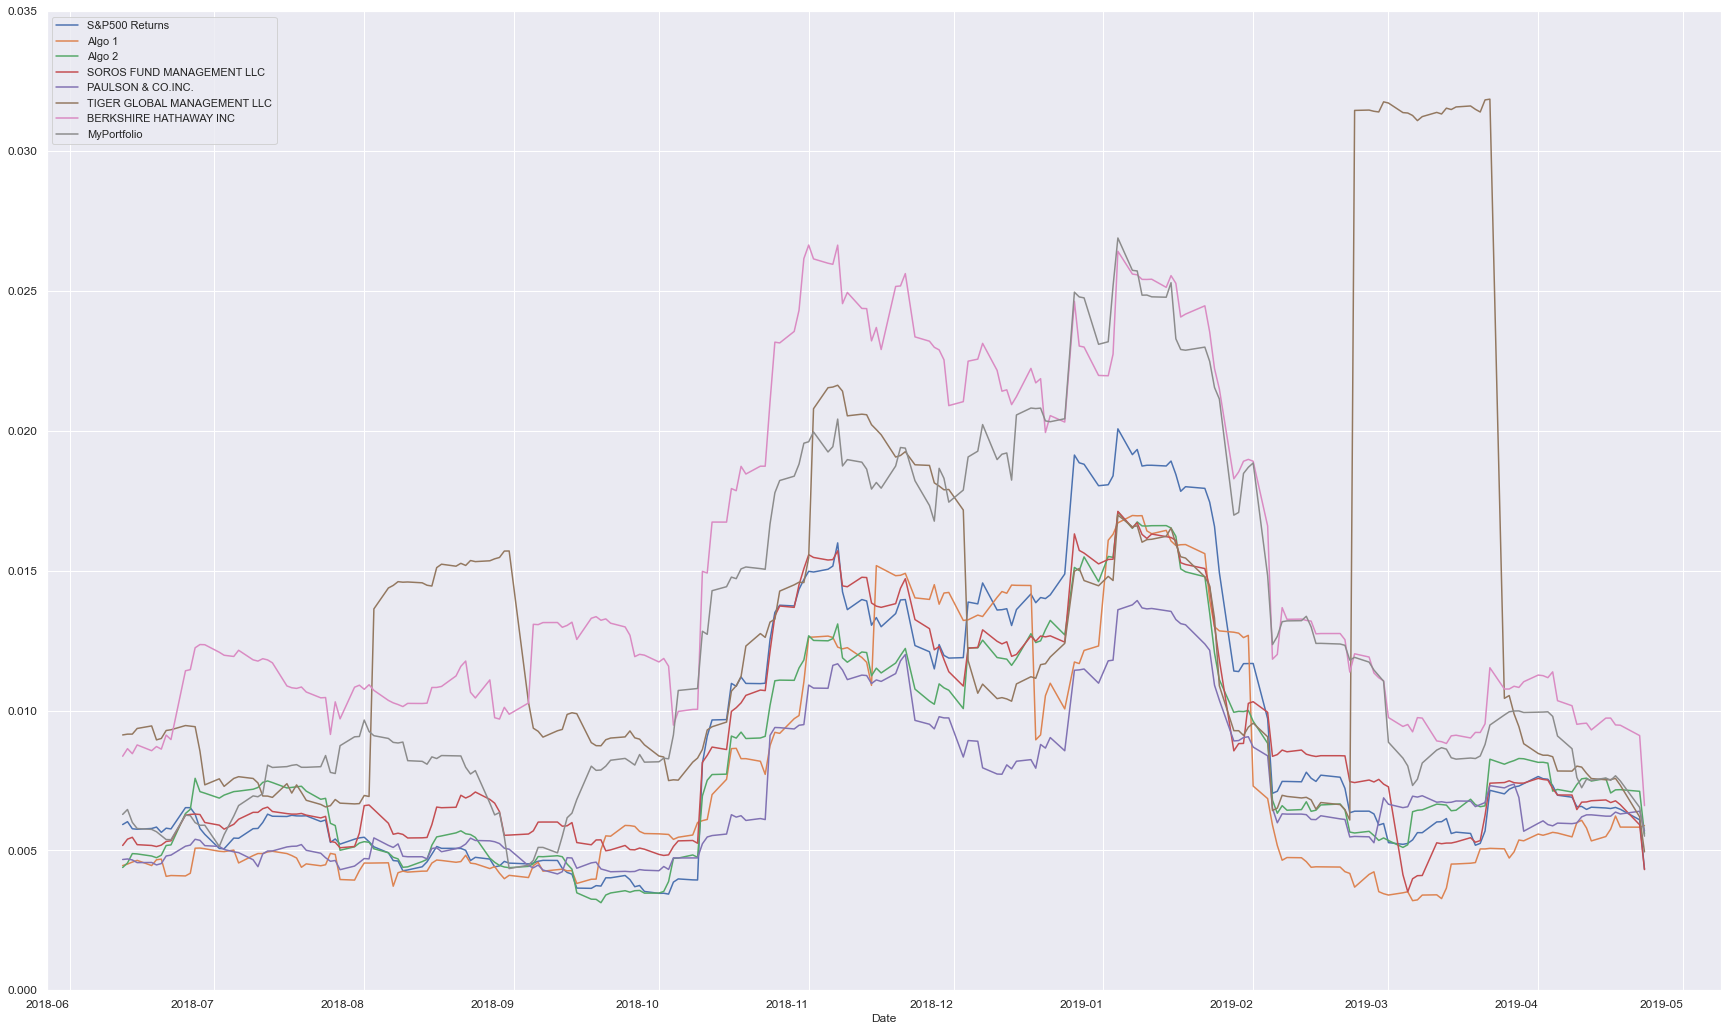

In [135]:
# Calculate rolling standard deviation
endreport.rolling(window=21).std().plot(              
            kind='line'
            , figsize=(30,20)
            , grid=True
            #, subplots=True
            , fontsize=12
            , ylim=[0,.035]
            , rot=360
            , lw=1.5)
# Plot rolling standard deviation

### Calculate and plot the correlation

<AxesSubplot:>

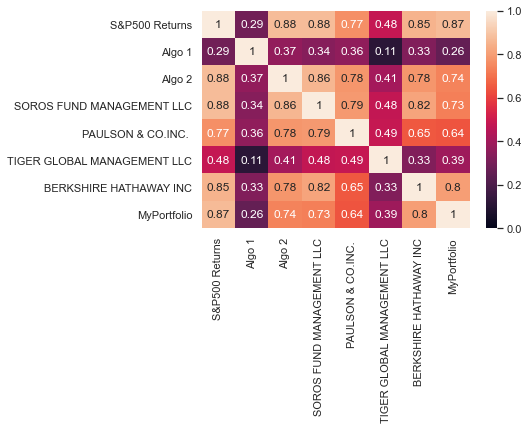

In [53]:
# Calculate and plot the correlation
endcor=endreport.corr()
sns.set_theme(style='dark')
sns.heatmap(endcor, vmin=0, vmax=1,annot=True,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

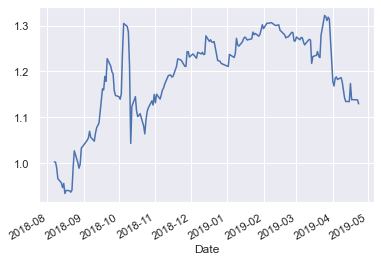

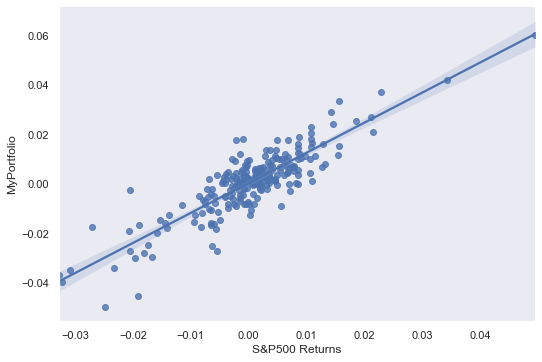

In [136]:
# Calculate and plot Beta
rolling_covariance = endreport['MyPortfolio'].rolling(window=60).cov(endreport['S&P500 Returns'])
rolling_variance = endreport['S&P500 Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(grid=True)
sns.lmplot(x='S&P500 Returns', y='MyPortfolio', data=endreport, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [137]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio=(endreport.mean()*252)/(endreport.std()*np.sqrt(252))
sharpe_ratio.sort_values(inplace=True)
sharpe_ratio

TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P500 Returns                 0.584820
MyPortfolio                    0.933123
Algo 1                         2.035665
dtype: float64

<AxesSubplot:>

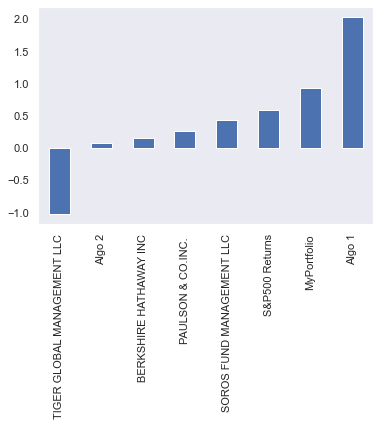

In [143]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar'
                , rot=90
                )

### How does your portfolio do?

Write your answer here!

In [ ]:
my portfolio outperforms the benchmark of the S&P 500, but doesnt compare to the sheer results the algo 1 has. I want to know the guy who made that algo. 